**In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand.**

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
# make sure you install TF HUB. It not directly available.

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Make predictions using ready made model (without any training)



In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
!wget https://images-na.ssl-images-amazon.com/images/I/51UqOC3XQ7L._AC_SX522_.jpg


# !wget https://animalfactguide.com/wp-content/uploads/2013/01/iStock_000005089840XSmall.jpg

--2022-05-30 16:10:48--  https://images-na.ssl-images-amazon.com/images/I/51UqOC3XQ7L._AC_SX522_.jpg
Resolving images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)... 13.33.98.213, 2a04:4e42::272, 2a04:4e42:200::272, ...
Connecting to images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)|13.33.98.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21771 (21K) [image/jpeg]
Saving to: ‘51UqOC3XQ7L._AC_SX522_.jpg’

51UqOC3XQ7L._AC_SX5 100%[===================>]  21.26K  --.-KB/s    in 0s      

2022-05-30 16:10:48 (347 MB/s) - ‘51UqOC3XQ7L._AC_SX522_.jpg’ saved [21771/21771]



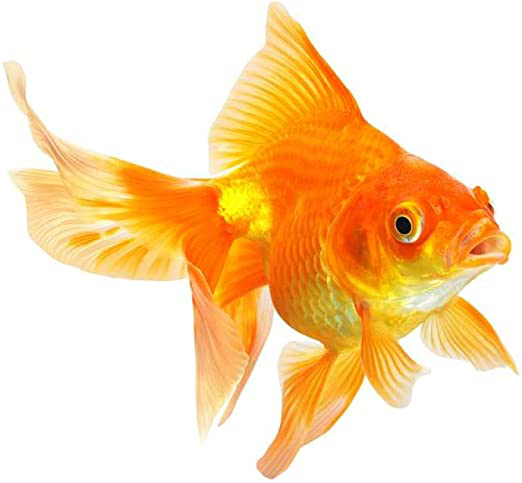

In [ ]:
Image.open("51UqOC3XQ7L._AC_SX522_.jpg")

# Image.open("/content/iStock_000005089840XSmall.jpg")

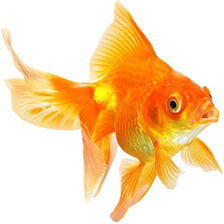

In [ ]:
gold_fish = Image.open("51UqOC3XQ7L._AC_SX522_.jpg").resize(IMAGE_SHAPE)
gold_fish

# cougar = Image.open("/content/iStock_000005089840XSmall.jpg").resize(IMAGE_SHAPE)
# cougar

In [ ]:
np.array(gold_fish)

# np.array(cougar)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Lets now go for classification.

Before that, we need to scale it in order to normalize the image.

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

# cougar = np.array(cougar)/255.0
# cougar.shape

(224, 224, 3)

In [ ]:
gold_fish

# cougar

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [ ]:
gold_fish.shape

# cougar.shape

(224, 224, 3)

In [ ]:
gold_fish[np.newaxis, ...].shape
# cougar[np.newaxis, ...].shape
# This adds one more dimension as it is required in this shape.
# We need to do this because when we do prediction, it accepts multiple images as input. Hence,
# its a mandatory step.

(1, 224, 224, 3)

In [ ]:
gold_fish[np.newaxis, ...]

# cougar[np.newaxis, ...]

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]])

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

# result = classifier.predict(cougar[np.newaxis, ...])
# result.shape

(1, 1001)

In [ ]:
result

array([[ 0.19283044,  2.191397  ,  8.874513  , ..., -1.8422296 ,
         0.83874863,  0.25119728]], dtype=float32)

In [ ]:
len(result[0])

1001

Now, we have 1000 classes and we see probability of each of the 1000 classes.

In [ ]:
# np.argmax(result) will give us the maximum probability
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

24576/10484 [======================================================================] - 0s 0us/step


'/root/.keras/datasets/ImageNetLabels.txt'

Lets get the image labels.

In [ ]:
image_labels = []
with open("/root/.keras/datasets/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

__This looks good and we see it predicts perfectly. Ofcourse it has to as it is a pre trained model.__

___Now, let us do classification for flowers dataset.___

**Load flowers dataset**

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
# Lets now convert the above string path to windows path

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
# Because we converted string path to windows path, we are able to do the below function.
# It basically goes recursively into all the directories and get the path of all 
# the images individually

list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/6036837996_7fbdcdb3c5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5402157745_a384f0583d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2122401867_cd86c5f114_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg')]

In [ ]:
list(data_dir.glob('*/*.jpg'))[2000:2006]

[PosixPath('datasets/flower_photos/daisy/2889325612_f2fc403ff0_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/14471433500_cdaa22e3ea_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/4301689054_20519e5b68.jpg'),
 PosixPath('datasets/flower_photos/daisy/7227973870_806d9d3e42_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5574421625_61b1f49b3f_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/4278442064_a5a598524b_m.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
# Total count of images

3670


In [ ]:
# Get roses images

roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6036837996_7fbdcdb3c5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5402157745_a384f0583d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2122401867_cd86c5f114_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg')]

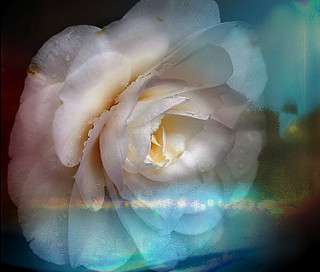

In [ ]:
# Using pillow library, lets try opening some files

Image.open(str(roses[0]))

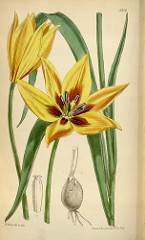

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

**Read flowers images from disk into numpy array using opencv**

Lets make a python dictionary so that the keys of the dictionary are the flower names and the values is the list of images.

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
# This gives me file paths of all roses

flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/6036837996_7fbdcdb3c5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5402157745_a384f0583d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2122401867_cd86c5f114_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg')]

In [ ]:
# this is the file path of any particular image

str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/6036837996_7fbdcdb3c5_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(272, 320, 3)

We need to resize it as before training any particular model, we need to ensure that all the images are of the same size.

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

Now we have our for loop wherein we are going through each rows(1st for loop) and in that in each images(2nd for loop), read image, resize it and then append the resized image to X and the label to 'y'.

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(3670, 224, 224, 3)

In [ ]:
y.shape

(3670,)

**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Preprocessing: scale images**

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

**Make prediction using pre-trained model on new flowers dataset**

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

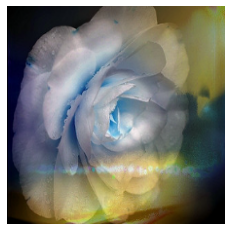

In [ ]:
# Lets look at the 0th image

plt.axis('off')
plt.imshow(X[0])

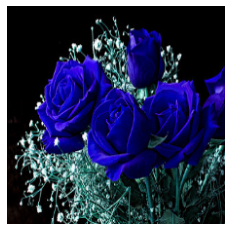

In [ ]:
# Lets look at the 1st image

plt.axis('off')
plt.imshow(X[1]);

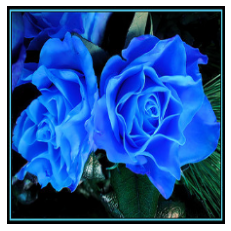

In [ ]:
# Lets look at the 2nd image

plt.axis('off')
plt.imshow(X[2]);

Lets now use our classifier to predict.

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 550, 550])

>It means 1st flower belongs to class 795

>It means 2nd flower belongs to class 550

>It means 3rd flower belongs to class 550

In [ ]:
# Lets see what is class 795

image_labels[795]

'shower curtain'

In [ ]:
# Lets see what is class 722

image_labels[550]

'envelope'

In [ ]:
# Lets see what is class 795

image_labels[795]

'shower curtain'

__Thats an incorrect prediction.__

The model is guessing randomly.

**Now take pre-trained model and retrain it using flowers images**

Here we remove the last layer.

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False) # trainable= False , it means please freeze 
    # the layers other than the last layer

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 8s 41ms/step - loss: 0.8518 - acc: 0.6737
Epoch 2/5
86/86 [==============================] - 4s 41ms/step - loss: 0.4168 - acc: 0.8536
Epoch 3/5
86/86 [==============================] - 4s 43ms/step - loss: 0.3247 - acc: 0.8943
Epoch 4/5
86/86 [==============================] - 4s 41ms/step - loss: 0.2742 - acc: 0.9164
Epoch 5/5
86/86 [==============================] - 4s 41ms/step - loss: 0.2367 - acc: 0.9270


We did train for only 5 epoch, which is very less than regular CNN which takes in my case as high as 30 epochs.

In [ ]:
# Lets look at the performance of our test dataset

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 55ms/step - loss: 0.3749 - acc: 0.8660


[0.37488678097724915, 0.8660130500793457]

https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/